In [17]:
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# rcParams['font.family'] = 'monospace'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['savefig.dpi'] = 300

import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]
# [f.name for f in matplotlib.font_manager.fontManager.afmlist]

['cmmi10',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'cmex10',
 'DejaVu Serif',
 'cmss10',
 'cmr10',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmtt10',
 'cmb10',
 'STIXGeneral',
 'cmsy10',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Mono',
 'Liberati

In [2]:
with open(r'../results/results.pickle', 'rb') as result_file:
    results = pickle.load(result_file)

In [3]:
# covert from dict to DF
r = pd.DataFrame.from_dict(results)
# only handle the BPIC datasets
r = r.loc[r.dataset.str.contains('BPIC')]

In [4]:
# Output dataset information for papers
datasets = {}
dataset_names = [re.match('../datasets/(.+).csv', x).groups()[0] for x in list(sorted(set(r['dataset'])))]
datasets['Dataset'] = [re.sub('_', ' ', x) for x in dataset_names]

datasets['Number of Columns'] = [len(pd.read_csv(x, nrows=1).columns) for x in list(sorted(set(r['dataset'])))]

print(pd.DataFrame.from_dict(datasets).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                                    Dataset &  Number of Columns \\
\midrule
           BPIC2011 Dutch academic hospital &                128 \\
          BPIC2012 loan application process &                  7 \\
               BPIC2013 incident management &                 12 \\
BPIC2013 problem management closed problems &                 12 \\
  BPIC2013 problem management open problems &                 11 \\
                                 BPIC2015 1 &                 29 \\
                                 BPIC2015 2 &                 28 \\
                                 BPIC2015 3 &                 29 \\
                                 BPIC2015 4 &                 29 \\
                                 BPIC2015 5 &                 29 \\
                                   BPIC2017 &                 19 \\
                                   BPIC2018 &                 75 \\
   BPIC2019 purchase order handling process &                 21 \\
          

/tmp/ipykernel_31973/4181267421.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame.from_dict(datasets).to_latex(index=False))


In [5]:
r.groupby('dataset').count()

,time_cand_selection,time_score_eval,n_timestamp_cand,n_case_id_cand,n_activity_cand,n_top_cands,n_cands,scores,correct_indices,cands,miner,metric,n_RF_estimators
dataset,,,,,,,,,,,,,
../datasets/BPIC2011_Dutch_academic_hospital.csv,137,137,137,137,137,137,137,137,137,137,130,130,130
../datasets/BPIC2012_loan_application_process.csv,110,110,110,110,110,110,110,110,110,110,100,100,100
../datasets/BPIC2013_incident_management.csv,110,110,110,110,110,110,110,110,110,110,100,100,100
../datasets/BPIC2013_problem_management_closed_problems.csv,110,110,110,110,110,110,110,110,110,110,100,100,100
../datasets/BPIC2013_problem_management_open_problems.csv,110,110,110,110,110,110,110,110,110,110,100,100,100
../datasets/BPIC2015_1.csv,191,191,191,191,191,191,191,191,191,191,190,190,190
../datasets/BPIC2015_2.csv,173,173,173,173,173,173,173,173,173,173,170,170,170
../datasets/BPIC2015_3.csv,146,146,146,146,146,146,146,146,146,146,140,140,140
../datasets/BPIC2015_4.csv,191,191,191,191,191,191,191,191,191,191,190,190,190


In [6]:
# check if the correct tuple is included in the candidates
r['is_in'] = r[['correct_indices', 'cands']].apply(lambda x: x['correct_indices'] in x['cands'], axis=1)

In [7]:
# check if the candidate with the highest score is the correct one
def if_highest_cands_is_correct(x):
    if x['n_cands'] == 0:
        # this means that no candidate is identified. return a dummy tuple
        return [[-1, -1, -1]]
    elif x['n_cands'] == 1:
        # this means that we only have a single candidate at the first stage
        return [np.array(x['cands']).flatten().tolist()]
    else:
        return [x['cands'][i] for i in np.argwhere(np.amax(x['scores']) == x['scores']).flatten().tolist()]
    
r['identified_indices'] = r.apply(lambda x: if_highest_cands_is_correct(x), axis=1)

In [8]:
# find identification accuracy by each key column
r['case_id_precision'] = r.apply(lambda x: sum([i[0] == x['correct_indices'][0] for i in x['identified_indices']]) / len(x['identified_indices']), axis=1)
r['timestamp_precision'] = r.apply(lambda x: sum([i[1] == x['correct_indices'][1] for i in x['identified_indices']]) / len(x['identified_indices']), axis=1)
r['activity_precision'] = r.apply(lambda x: sum([i[2] == x['correct_indices'][2] for i in x['identified_indices']]) / len(x['identified_indices']), axis=1)

In [683]:
# For the research dashboard, we select datasets
datasets_for_dashboard = {
    'file_name': [
        '../datasets/BPIC2012_loan_application_process.csv',
        '../datasets/BPIC2013_problem_management_open_problems.csv',
        '../datasets/BPIC2015_2.csv',
        '../datasets/BPIC2019_purchase_order_handling_process.csv'
    ],
    'legend_name': [
        'Loan application',
        'Issue desk processes',
        'Processes in city hall',
        'Purchase order handling'
    ]
}
r = r.loc[r['dataset'].isin(datasets_for_dashboard['file_name'])]
r['dataset'] = r['dataset'].map(lambda x: datasets_for_dashboard['legend_name'][datasets_for_dashboard['file_name'].index(x)])
r = r.loc[(r['n_top_cands'] == 1) | (r['n_top_cands'].isnull())]
r = r.loc[(r['miner'] == 'inductive_miner') | (r['miner'].isnull())]

In [9]:
# check if all columns are correctly identified
r['is_all_correct'] = r.apply(lambda x: x['correct_indices'] in x['identified_indices'], axis=1)

In [10]:
# find how much we could identify all the key columns correctly
# conditions:
r.groupby(['dataset', 'n_top_cands']).apply(lambda x: round(sum(x['is_all_correct']) / len(x), ndigits=2))

dataset                                                      n_top_cands
../datasets/BPIC2011_Dutch_academic_hospital.csv             1              0.00
                                                             2              0.00
../datasets/BPIC2012_loan_application_process.csv            1              0.60
                                                             2              0.56
../datasets/BPIC2013_incident_management.csv                 1              0.50
                                                             2              0.57
../datasets/BPIC2013_problem_management_closed_problems.csv  1              0.30
                                                             2              0.78
../datasets/BPIC2013_problem_management_open_problems.csv    1              0.90
                                                             2              0.83
../datasets/BPIC2015_1.csv                                   1              0.00
                                    

In [12]:
tmp = pd.merge(
    r.groupby(['dataset']).apply(lambda x: round(sum(x['case_id_precision']) / len(x), ndigits=2)).reset_index(name='case_id'),
    r.groupby(['dataset']).apply(lambda x: round(sum(x['activity_precision']) / len(x), ndigits=2)).reset_index(name='activity'), 
    on='dataset')
pd.merge(
    tmp,
    r.groupby(['dataset']).apply(lambda x: round(sum(x['timestamp_precision']) / len(x), ndigits=2)).reset_index(name='timestamp'),
    on='dataset')

,dataset,case_id,activity,timestamp
0,../datasets/BPIC2011_Dutch_academic_hospital.csv,0.00,0.01,0.61
1,../datasets/BPIC2012_loan_application_process.csv,0.65,0.99,0.87
2,../datasets/BPIC2013_incident_management.csv,0.67,0.78,0.91
3,../datasets/BPIC2013_problem_management_closed...,0.84,0.85,1.00
4,../datasets/BPIC2013_problem_management_open_p...,0.87,0.92,1.00
5,../datasets/BPIC2015_1.csv,0.99,0.51,0.00
6,../datasets/BPIC2015_2.csv,0.71,0.36,0.74
7,../datasets/BPIC2015_3.csv,0.70,0.12,0.65
8,../datasets/BPIC2015_4.csv,0.90,0.43,0.10
9,../datasets/BPIC2015_5.csv,0.71,0.48,0.08


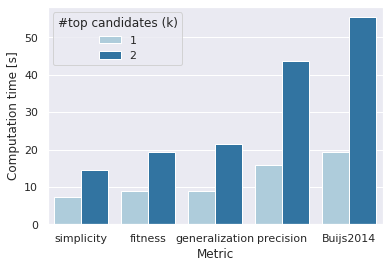

In [32]:
r_time = r.groupby(['n_top_cands', 'metric'])\
    .apply(lambda x: round(np.mean(x['time_cand_selection'] + x['time_score_eval']), ndigits=2))\
    .to_frame('time')\
    .reset_index()

plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.set(font_scale=1)
sns.barplot(data=r_time, hue='n_top_cands', y='time', x='metric',
            order=['simplicity', 'fitness', 'generalization', 'precision', 'Buijs2014'],
            palette=sns.color_palette('Paired'))
plt.legend(title='#top candidates (k)')
plt.xlabel('Metric')
plt.ylabel('Computation time [s]')
plt.savefig('../plots/computation_time.png', transparent=True)

In [19]:
# the number of candidates for each dataset
r.groupby(['dataset', 'n_top_cands']).sample(1)

,dataset,time_cand_selection,time_score_eval,n_timestamp_cand,n_case_id_cand,n_activity_cand,n_top_cands,n_cands,scores,correct_indices,cands,miner,metric,n_RF_estimators,is_in,identified_indices,case_id_precision,timestamp_precision,activity_precision,is_all_correct
1547,../datasets/BPIC2011_Dutch_academic_hospital.csv,0.550378,3.860234,1,2,1,1,1,[0.948],"[25, 7, 3]","[[6, 7, 5]]",heuristics_miner,Buijs2014,100.0,False,"[[6, 7, 5]]",0.0,1.0,0.0,False
878,../datasets/BPIC2011_Dutch_academic_hospital.csv,0.557993,0.593037,1,2,2,2,2,"[0.993, 0.966]","[25, 7, 3]","[[6, 7, 0], [6, 7, 44]]",inductive_miner,fitness,100.0,False,"[[6, 7, 0]]",0.0,1.0,0.0,False
449,../datasets/BPIC2012_loan_application_process.csv,1.127890,0.000000,1,1,1,1,1,[],"[5, 3, 2]","[[5, 3, 2]]",None,None,NaN,True,"[[5, 3, 2]]",1.0,1.0,1.0,True
1567,../datasets/BPIC2012_loan_application_process.csv,0.564688,2.529879,2,2,1,2,2,"[0.631, 0.605]","[5, 3, 2]","[[6, 3, 2], [6, 4, 2]]",inductive_miner,simplicity,100.0,False,"[[6, 3, 2]]",0.0,1.0,1.0,False
1336,../datasets/BPIC2013_incident_management.csv,0.556438,0.000000,1,1,1,1,1,[],"[11, 10, 6]","[[11, 10, 6]]",None,None,NaN,True,"[[11, 10, 6]]",1.0,1.0,1.0,True
1339,../datasets/BPIC2013_incident_management.csv,0.573748,63.731099,1,2,2,2,4,"[0.407, 0.226, 0.467, 0.211]","[11, 10, 6]","[[8, 10, 6], [8, 10, 9], [11, 10, 6], [11, 10,...",inductive_miner,precision,100.0,True,"[[11, 10, 6]]",1.0,1.0,1.0,True
681,../datasets/BPIC2013_problem_management_closed...,0.543661,0.000000,1,1,1,1,1,[],"[11, 10, 6]","[[4, 10, 6]]",None,None,NaN,False,"[[4, 10, 6]]",0.0,1.0,1.0,False
37,../datasets/BPIC2013_problem_management_closed...,0.555581,1.119939,1,2,2,2,4,"[0.756, 0.742, 0.767, 0.787]","[11, 10, 6]","[[4, 10, 6], [4, 10, 9], [11, 10, 6], [11, 10,...",inductive_miner,generalization,100.0,True,"[[11, 10, 9]]",1.0,1.0,0.0,False
482,../datasets/BPIC2013_problem_management_open_p...,0.543988,0.000000,1,1,1,1,1,[],"[10, 8, 5]","[[10, 8, 5]]",None,None,NaN,True,"[[10, 8, 5]]",1.0,1.0,1.0,True
2034,../datasets/BPIC2013_problem_management_open_p...,0.558562,0.134039,1,1,2,2,2,"[0.714, 0.592]","[10, 8, 5]","[[10, 8, 5], [10, 8, 9]]",heuristics_miner,simplicity,100.0,True,"[[10, 8, 5]]",1.0,1.0,1.0,True


In [20]:
def precision_summary(x):
    c = round(sum(x['case_id_precision']) / len(x), ndigits=2)
    t = round(sum(x['timestamp_precision']) / len(x), ndigits=2)
    a = round(sum(x['activity_precision']) / len(x), ndigits=2)
    avg = round(np.mean([c, t, a]), ndigits=2)
    return pd.DataFrame({'accuracy': [c, t, a, avg]}, 
                        index=['case-id', 'timestamp', 'activity', 'average'])
    # return pd.DataFrame(data={'case_id': [c], 'timestamp': [t], 'activity': [a], 'average': [avg]})

,metric,n_top_cands,level_2,accuracy
0,Buijs2014,1,case-id,0.74
1,Buijs2014,1,timestamp,0.46
2,Buijs2014,1,activity,0.43
3,Buijs2014,1,average,0.54
4,Buijs2014,2,case-id,0.60
5,Buijs2014,2,timestamp,0.66
6,Buijs2014,2,activity,0.40
7,Buijs2014,2,average,0.55
8,fitness,1,case-id,0.74
9,fitness,1,timestamp,0.46


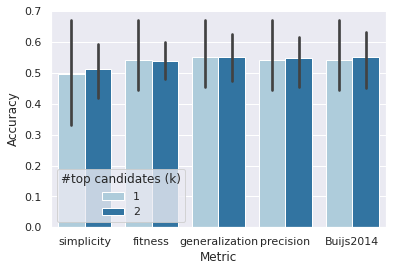

In [33]:
# metric (accuracy and time)
# conditions: 
# * scores shouldn't be [] (only consider the cases that entered the second stage),
# * miner == inductive_miner
pd.set_option('display.max_rows', None)

tmp = r.loc[(r['miner'] == 'inductive_miner') & (len(r['scores']) > 0)]\
.groupby(['metric', 'n_top_cands'])\
.apply(func=precision_summary)\
.reset_index()
display(tmp)

plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.set(font_scale=1)
sns.barplot(data=tmp, x='metric', y='accuracy', hue='n_top_cands',
            order=['simplicity', 'fitness', 'generalization', 'precision', 'Buijs2014'],
            palette=sns.color_palette('Paired'))
plt.legend(title='#top candidates (k)')
plt.xlabel('Metric')
plt.ylabel('Accuracy')
plt.savefig('../plots/accuracy_metric.png')

In [76]:
r.loc[(r['miner'] == 'inductive_miner') & (len(r['scores']) > 0) & (r['metric'] == 'generalization')]\
.groupby(['n_top_cands'])\
.apply(precision_summary)

,0,1,2,3
n_top_cands,,,,
1,0.62,0.54,0.39,0.52
2,0.61,0.58,0.41,0.53


In [ ]:
# miner (accuracy and time?)
# conditions: 
# * scores shouldn't be null,
# * metric == ?

In [ ]:
# accuracy vs number of columns 